# Util Bloqs

The utility bloqs let you reshape Soquets.

In [1]:
from qualtran.drawing import GraphDrawer, PrettyGraphDrawer
from qualtran.bloqs.util_bloqs import Split, Join

from IPython.display import SVG

def show_bloq(bloq, draw_cls=PrettyGraphDrawer):
    display(SVG(draw_cls(bloq).get_graph().create_svg()))

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


## Split and Join

Split and join take a `bitsize=n, shape=()` to `bitsize=1, shape=(n,)` and back.

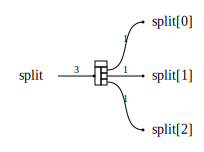

In [2]:
show_bloq(Split(3))

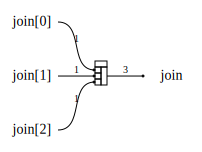

In [3]:
show_bloq(Join(3))

## SplitJoin

For fun, we can pair `Split` and `Join` into an identity operation.

In [4]:
from attrs import frozen
from functools import cached_property
from typing import *
from qualtran import Bloq, Signature, Register

@frozen
class SplitJoin(Bloq):
    n: int

    @cached_property
    def signature(self) -> Signature:
        return Signature([Register('x', self.n)])

    def build_composite_bloq(
        self, bb: 'BloqBuilder', *, x: 'Soquet'
    ) -> Dict[str, 'Soquet']:
        xs = bb.split(x)
        x = bb.join(xs)
        return {'x': x}

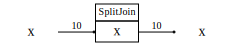

In [5]:
show_bloq(SplitJoin(10))

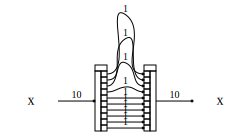

In [6]:
show_bloq(SplitJoin(10).decompose_bloq())